# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
print(str(max(bdata.target)))

50.0


---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

### 1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


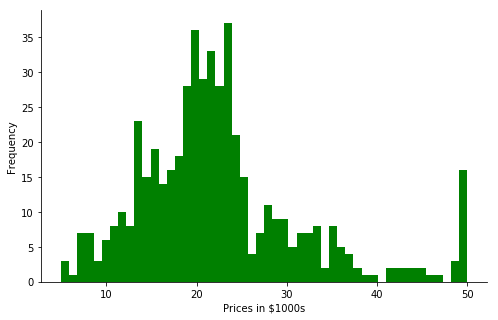

In [5]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
fig, ax=plt.subplots(1,1,figsize=(8,5))
# edit the code below to make the graph look good
ax.set_ylabel("Frequency")
ax.set_xlabel("Prices in $1000s")
ax.hist(bdata.target,bins=50, color='Green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


#### Features
- MEDV - Median value of owner-occupied homes in $1000's
- CRIM - per capita crime rate by town

In [6]:
bdata_df=pd.DataFrame(data=bdata.data,columns=bdata.feature_names)
bdata_df['MEDV']=bdata.target

[]

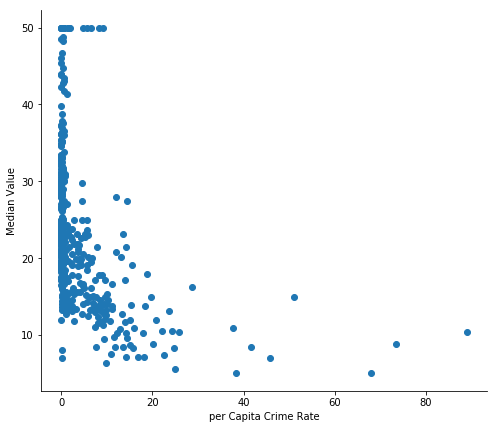

In [7]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(bdata_df['CRIM'],bdata_df['MEDV'])
ax.set_xlabel('per Capita Crime Rate')
ax.set_ylabel('Median Value')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot()

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

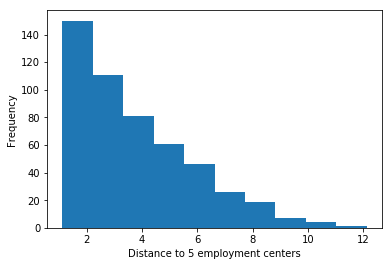

In [34]:
bdata_df.head()
plt.hist(bdata_df['DIS'])
plt.xlabel('Distance to 5 employment centers')
plt.ylabel('Frequency')
plt.show()

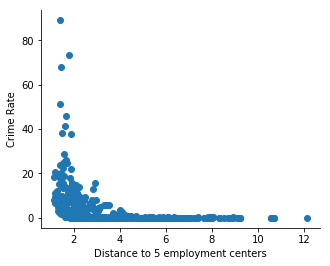

In [36]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(bdata_df['DIS'],bdata_df['CRIM'])
ax.set_xlabel('Distance to 5 employment centers')
ax.set_ylabel('Crime Rate')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot()
plt.show()

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [10]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    p=np.array(predictions)
    y=np.array(yvalues)
    rmse=p-y
    rmse=rmse**2
    rmse=np.mean(rmse)
    rmse=np.sqrt(rmse)
    return rmse

In [11]:
compute_rmse([2,2,3],[0,2,6])

2.0816659994661326

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [12]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
mask = np.random.choice([False, True], len(bdata_df), p=[0.34, 0.66])
bdata_train=bdata_df[mask]
bdata_test=bdata_df[np.invert(mask)]


### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [13]:
MEDV_train=bdata_train['MEDV']
MEDV_test=bdata_test['MEDV']
MEDV_mean_train=np.full(len(MEDV_train),np.mean(MEDV_train))
MEDV_mean_test=np.full(len(MEDV_test),np.mean(MEDV_train))

In [14]:
print("RMSE on training set: " +str(compute_rmse(MEDV_train,MEDV_mean_train)))

RMSE on training set: 9.866524423970391


In [15]:
print("RMSE on test set: " +str(compute_rmse(MEDV_test,MEDV_mean_test)))

RMSE on test set: 7.8044830442765685


#### Observations:
Our model performs really well on the training dataset. However, poorly on the testing data

---

## Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [16]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    x1=np.array(x1)
    x2=np.array(x2)
    dist=np.power(np.sum(np.power(np.abs(x1-x2),L)),1/L)
    return dist

In [17]:
y1=np.array([3,4])
y2=np.array([6,8])
distance(y1,y2,2)

5.0

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [18]:
"""
Function
--------
nneighbor

Given two data framee, one training data frame and one testing data frame of N columns each, 
computes rmse of one nearest neighbur algorithm. The model is fitted on the last column of the data frame.

Parameters
----------
data_train : dataframe
    Dataframe for training the model. N columns with N-1 features.

data_test : dataframe
    Dataframe for testing the model. N columns with N-1 features.

L : int
    Denotes value of p in p-norm distance
    
showTimeTaken: boolean (Optional)
    shows time taken to run the algorithm when True, default=True
    
Prints
-------
Run time when showTimeTaken=True

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> print nneighbor(df_train,df_test,2,True)
2.01
"""
import time
def nneighbor(data_train, data_test, L, showTimeTaken=True):
    start_time = time.time()
    data_train_np=np.array(data_train)
    data_test_np=np.array(data_test)
    
    test_data_num_cols=len(data_test_np[0])
    
    data_pred_np=np.zeros((len(data_test_np),test_data_num_cols+1))
    
    
    for i in range(len(data_test_np)):
        data_dict={}
        for j in range(len(data_train_np)):
            data_dict[j]=distance(data_test_np[:,0:(test_data_num_cols-1)][i],data_train_np[:,0:(test_data_num_cols-1)][j],L)
        data_pred_np[i]=np.append(data_test_np[i], data_train_np[min(data_dict, key=data_dict.get)][(test_data_num_cols-1)])
        
    rmse=compute_rmse(data_pred_np[:,test_data_num_cols],data_pred_np[:,(test_data_num_cols-1)])
    
    if showTimeTaken==True:
        print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    
    return rmse

#your additional code here

In [19]:
training_data=bdata_train[['CRIM','RM','MEDV']]
test_data=bdata_test[['CRIM','RM','MEDV']]

In [20]:
nneighbor(training_data,test_data,2)

Time taken: 1.69 seconds


7.324853796907308

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [37]:
"""
Function
--------
normalize

Given a data frame return a normalized data frame.
Each value is subtracted from the mean of the column 
and divided by the standard deviation of the column.
Only the features are normalized. 
The variable is indicated by last column and is not subjected to normalization.

Parameters
----------
raw_data : dataframe
    Dataframe for training the model. N columns with N-1 features.

Returns
-------
normalized_df: dataframe
    Normalized N-1 columns of dataframe. Returns the last columns as it is.

"""
def normalize(raw_data):
    normalized_df=pd.DataFrame(columns=list(raw_data),index=raw_data.index)
    df_means={}
    df_stds={}
    list_of_cols=list(raw_data)
    list_of_cols.pop(-1)
    
    for col in list_of_cols:
        df_means[col]=raw_data.mean()[col]
        df_stds[col]=raw_data.std()[col]
    
    for col in list_of_cols:
        for row_num in range(len(raw_data)):
            normalized_df[col].iloc[row_num]=(raw_data[col].iloc[row_num]-df_means[col])/df_stds[col]
    normalized_df.iloc[:,-1]=raw_data.iloc[:,-1]
    return normalized_df

In [22]:
training_data=normalize(bdata_train[['CRIM','RM','MEDV']])
test_data=normalize(bdata_test[['CRIM','RM','MEDV']])
nneighbor(training_data,test_data,2)

Time taken: 2.11 seconds


8.025615591216509

#### Observations
By normalization, we are able to make better comparisons and RMSE increases.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [23]:
dataset1=(normalize(bdata_train[['CRIM','RM','TAX','AGE','LSTAT','MEDV']]),normalize(bdata_test[['CRIM','RM','TAX','AGE','LSTAT','MEDV']]))
dataset2=(normalize(bdata_train[['TAX','LSTAT','MEDV']]),normalize(bdata_test[['TAX','LSTAT','MEDV']]))
dataset3=(normalize(bdata_train[['CRIM','RM','MEDV']]),normalize(bdata_test[['CRIM','RM','MEDV']]))

print("RMSE for features 'CRIM','RM','TAX','AGE','LSTAT' and L=2: "+ str(nneighbor(dataset1[0],dataset1[1],2)))
print("RMSE for features 'TAX','LSTAT','MEDV' and L=2: "+ str(nneighbor(dataset2[0],dataset2[1],2)))
print("RMSE for features 'CRIM','RM','MEDV' and L=4: "+ str(nneighbor(dataset3[0],dataset3[1],4)))

Time taken: 2.59 seconds
RMSE for features 'CRIM','RM','TAX','AGE','LSTAT' and L=2: 4.701834449553838
Time taken: 2.1 seconds
RMSE for features 'TAX','LSTAT','MEDV' and L=2: 6.260788441571266
Time taken: 2.1 seconds
RMSE for features 'CRIM','RM','MEDV' and L=4: 7.79306087187884


#### Observations
Increasing the number of features requires more time to run and RMSE is better. Changing the L from 2 to 4 resulted into higher RMSE

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [24]:
np.random.randint(10)

2

In [25]:
def get10folds(data_df):
    data_df['splitter']=0
    df_list=[]
    for i in range(len(data_df)):
        data_df['splitter'].iloc[i]=np.random.randint(10)
    for i in range(10):
        df_list.append(data_df[data_df['splitter']==i].drop(columns=['splitter']))
    return df_list

In [26]:
df_list=get10folds(normalize(bdata_df[['CRIM','RM','MEDV']]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
rmse_sum=0
for i in range(len(df_list)):
    df_list2=list(df_list)
    testing_data=df_list2.pop(i)
    training_data=pd.concat(df_list2)
    rmse1=nneighbor(training_data,testing_data,2,False)
    rmse_sum+=rmse1
    #print(str(len(testing_data))+str(len(training_data)))
print("Mean RMSE: "+str(rmse_sum/10))

Mean RMSE: 7.118243565917204


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [28]:
"""
Function
--------
knn

Given two data framee, one training data frame and one testing data frame of N columns each, 
computes rmse of K-nearest neighbors algorithm. The model is fitted on the last column of the data frame.

Parameters
----------
data_train : dataframe
    Dataframe for training the model. N columns with N-1 features.

data_test : dataframe
    Dataframe for testing the model. N columns with N-1 features.

L : int
    Denotes value of p in p-norm distance

K : int
    Denotes number of neighbors
    
showTimeTaken: boolean (Optional)
    shows time taken to run the algorithm when True, default=True
    
Prints
-------
Run time when showTimeTaken=True

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> print nneighbor(df_train,df_test,2,True)
2.01
"""
def knn(data_train,data_test, L, K,showTimeTaken=True):
    start_time = time.time()
    data_train_np=np.array(data_train)
    data_test_np=np.array(data_test)
    test_data_num_cols=len(data_test_np[0])
    data_pred_np=np.zeros((len(data_test_np),test_data_num_cols+1))
    
    for i in range(len(data_test_np)):
        data_dict={}
        k_dist_np=np.zeros(K)
        for j in range(len(data_train_np)):
            data_dict[j]=distance(data_test_np[:,0:(test_data_num_cols-1)][i],data_train_np[:,0:(test_data_num_cols-1)][j],L)
        
        sort_dict=sorted(data_dict.items(), key=lambda x: x[1])
        
        for k in range(K):
            k_dist_np[k]=sort_dict[k][0]
        
        pred_val=0
        for index in k_dist_np:
            pred_val+=data_train_np[int(index)][(test_data_num_cols-1)]
        pred_val/=K
        
        data_pred_np[i]=np.append(data_test_np[i], pred_val)
        
    rmse=compute_rmse(data_pred_np[:,test_data_num_cols],data_pred_np[:,(test_data_num_cols-1)])
    if showTimeTaken:
        print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

# enter your additional code here

In [29]:
dataset=(normalize(bdata_train[['CRIM','RM','MEDV']]),normalize(bdata_test[['CRIM','RM','MEDV']]))
knn(dataset[0],dataset[1],2,3)

Time taken: 2.39 seconds


6.345458529142607

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [30]:
bdata_df3=bdata_df[['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX','MEDV']]
df_list=get10folds(normalize(bdata_df3))


In [32]:
rmse_list=[]
for k in range(25):
    rmse_sum=0
    for i in range(len(df_list)):
        df_list2=list(df_list)
        testing_data=df_list2.pop(i)
        training_data=pd.concat(df_list2)
        rmse1=knn(training_data,testing_data,2,(k+1),False)
        rmse_sum+=rmse1
    rmse_sum/=10
    rmse_list.append(rmse_sum)

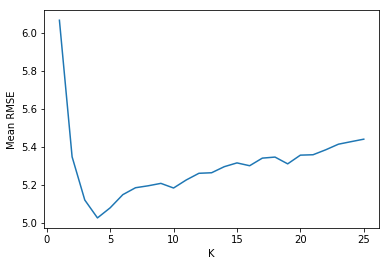

In [33]:
k_list=np.arange(1,26)
plt.xlabel('K')
plt.ylabel('Mean RMSE')
plt.plot(k_list,rmse_list)
plt.show()

#### Observations
As we increase K from 1 to 4 the RMSE decreases. 
It falls down at K=4 which is the optimum value.
Post that RMSE shows an increasing trend.

- K=4 is a very reasonable choice for K
